In [ ]:
# ..... batch effects in data at each time point ..... #

In [2]:
library(Seurat)
library(dplyr)
library(pheatmap)

In [3]:
scnew = readRDS('chicken_integrated_ssSTACAS_v2.rds')
scnew

An object of class Seurat 
19007 features across 50547 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [4]:
scnew2 = CreateSeuratObject(counts = LayerData(scnew, assay = 'RNA', layer = 'counts'),
                            meta.data = scnew@meta.data)

scnew2 <- NormalizeData(object = scnew2, normalization.method = "LogNormalize", scale.factor = 10000)
scnew2 <- FindVariableFeatures(scnew2)
scnew2 <- ScaleData(scnew2)
scnew2 <- RunPCA(scnew2, npcs = 30)

# cluster the data
scnew2 <- FindNeighbors(scnew2, dims = 1:30, k = 30)
scnew2 <- FindClusters(object = scnew2, resolution = 1, verbose = FALSE)

# run umap
scnew2 <- RunUMAP(object = scnew2, dims = 1:30, verbose = FALSE)

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  LDB3, MYBPC3, CCDC141, RBM20, TRIM55, MYOM1, MYL3, CHRM2, KIRREL3, RGS6 
	   SCN5A, PALM2AKAP2.1, MYH7B, ENSGALG00010021609, PLEKHA7, NRXN3, STC2, SMPX, KCNQ1, PCDH7 
	   COL19A1, FHL2, PEX5L, CORIN, FGF14, PPARGC1A, ENSGALG00010024234, GPA33, KIF26B, HS6ST3 
Negative:  CNTNAP2, PTPRM, EBF1, EBF3, MECOM, GMDS, PDE10A, AFAP1, FLI1, SEMA6A 
	   ENSGALG00010008269, HMCN1, RAPGEF5, LIMCH1, PPP3CA, SOX5, ITGA8, KLHL4, GALNT2, PLEKHG1 
	   ANKRD44, PREX2, FGD5, XKR4, NOVA1.1, ST3GAL1, SRGAP1, NFATC1, POSTN, UNC13C 
PC_ 2 
Positive:  CA13, HBBA, SLC4A1, TUBB1, HBA1, HBAD, GAB3, MFSD2B, SLC39A8, ENSGALG00010021710 
	   ABCB10, TFRC, ENSGALG00010001729, BANK1, FTH1, SLC16A10, DPEP2, HBZ, OSGIN1, H1F0 
	   SLC30A10, SLC6A13, KCNK5, SH3BGRL2, RHAG, IKZF1, SPNS2, HBE1, STK10, BLVRA 
Negative:  ATRNL1, EPHA7, UNC5C, MAGI2, STXBP6, KLHL29, PTPRD, MID1, KIAA1217, GLI2 
	   SORCS

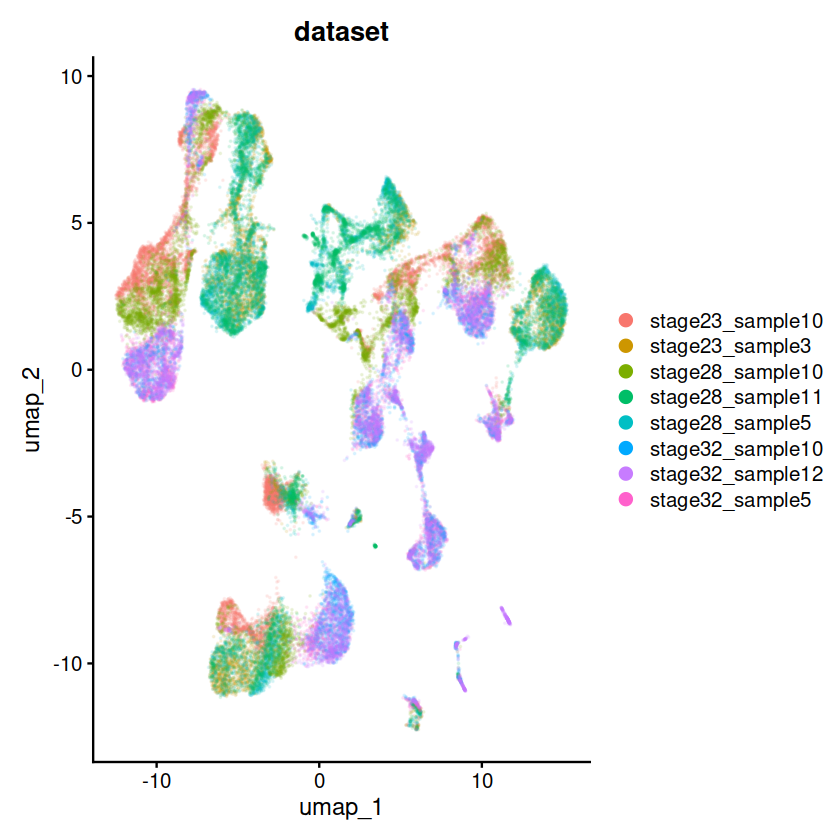

In [5]:
# plot integrated umap
tplot <- DimPlot(scnew2, reduction = "umap", group.by = "dataset")
tplot[[1]]$layers[[1]]$aes_params$alpha =  .1
tplot

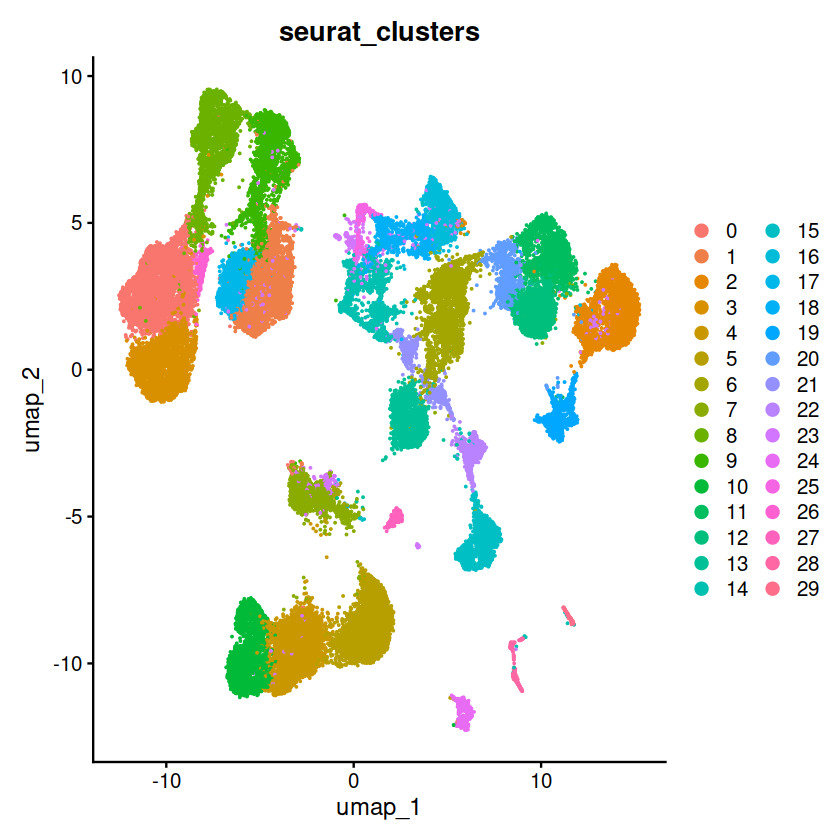

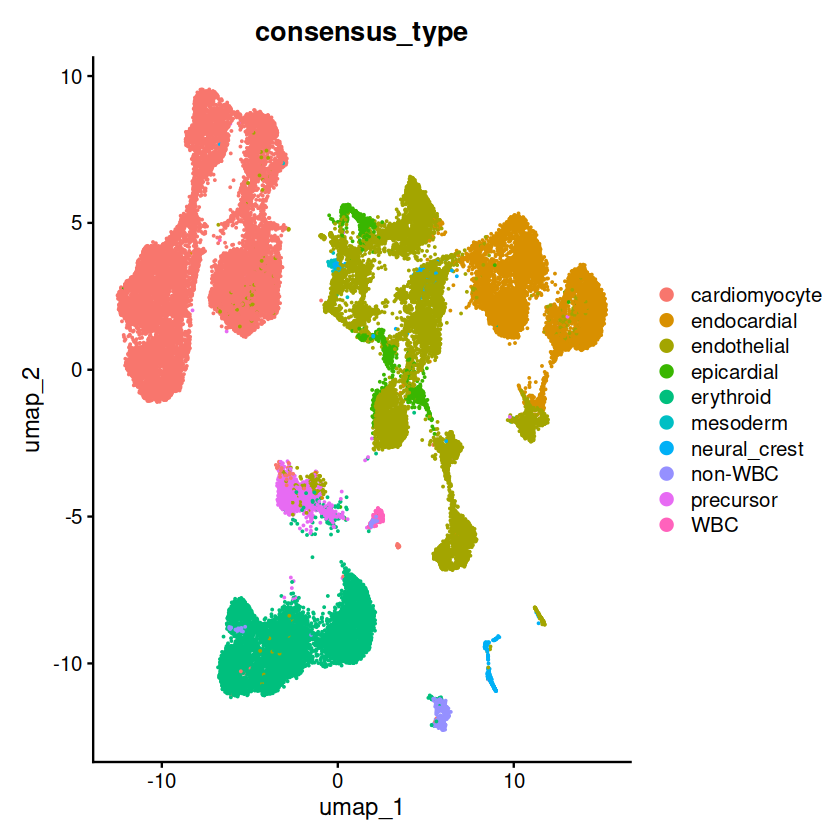

In [6]:
DimPlot(scnew2, reduction = "umap", group.by = "seurat_clusters")
DimPlot(scnew2, reduction = "umap", group.by = "consensus_type")

In [9]:
df = scnew2@reductions$pca@cell.embeddings
rownames(df) = NULL
colnames(df) = NULL
df[1:2,]

[,1]       [,2]       [,3]       [,4]     [,5]     [,6]     [,7]     
[1,] -14.810483 -0.4104399 -14.804557 2.722996 4.143417 4.353694 0.5179195
[2,]   8.775182 -4.9082098  -2.084365 5.357310 2.239411 1.937966 0.3228443
     [,8]      [,9]       [,10]      [,11] [,12]      [,13]      [,14]     
[1,] -1.900435  0.4890334 -0.4053452 ⋯     -1.1365135 -0.1258103 -0.8908372
[2,] -4.987715 -0.3569334 -3.5911787 ⋯     -0.4297612  1.9855616 -0.6207748
     [,15]      [,16]    [,17]       [,18]     [,19]      [,20]     [,21]    
[1,] 0.01461555 1.487442 -0.09788236 -1.176379 -0.6662605 0.4377488 0.1571521
[2,] 2.35275924 1.931426 -0.97256719 -1.926416 -0.5636734 0.7616141 0.8650340

In [10]:
# save cluster and umap from merging all batches
write.table(df, file = 'chicken_raw_embeddings_new2.csv', sep = ',', row.names = F,
           col.names = F, quote = F)